In [1]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Feature extraction and Dimensionality Reduction

In [3]:
df_data = pd.read_csv(r"output_data_sets/df_data_before_tsa.csv", sep=',')

In [4]:
TEST_SIZE=0.15

In [5]:
def get_feature_importance_data(df, col_name):
    data = df.copy()
    y = data[col_name]
    data = data.drop(col_name, axis=1)
    X = data.iloc[:, 1:]
    X = (X - X.min ()) / (X.max () - X.min ())
   
    train_samples = int(X.shape[0] * (1-TEST_SIZE ))
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

## 1. XGBoosting

### 1.1 XGBoosting Price Dataset

In [6]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df_data, 'price actual')

In [23]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [24]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

In [25]:
eval_result = regressor.evals_result()

In [26]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

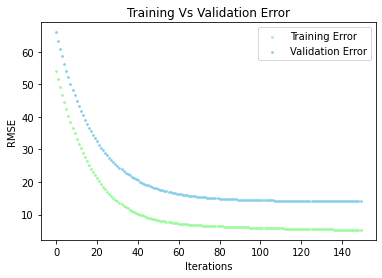

In [27]:
figsize=(30, 12)
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error', color = "palegreen", s=3)
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error', color = "skyblue", s=3)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Top 50 features important')

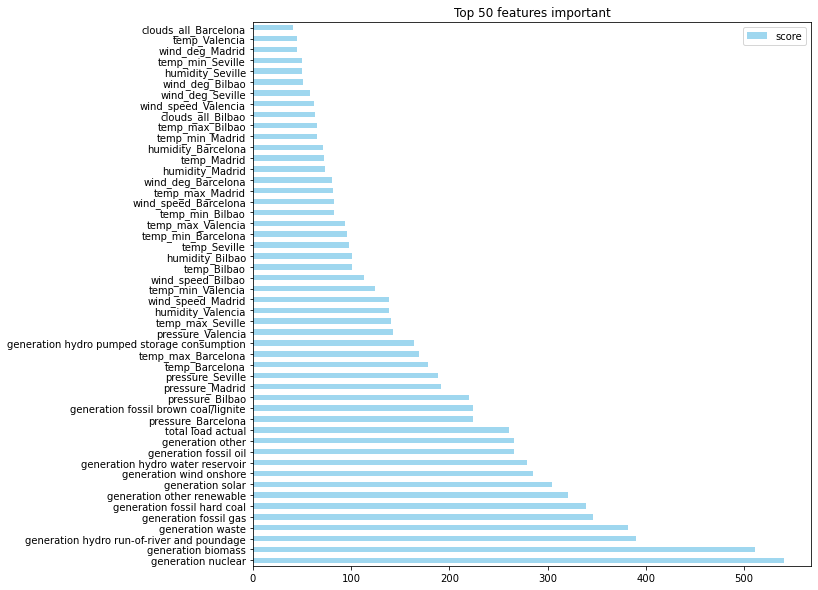

In [28]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
feature_important = xgbModel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(50, columns="score").plot(kind='barh', figsize = (10,10), color = 'skyblue', alpha = 0.8)
plt.title("Top 50 features important")
## plot top 50 features 

In [29]:
data.nlargest(50, columns="score").head(10)

score
generation nuclear                          541.0
generation biomass                          511.0
generation hydro run-of-river and poundage  390.0
generation waste                            382.0
generation fossil gas                       346.0
generation fossil hard coal                 339.0
generation other renewable                  321.0
generation solar                            304.0
generation wind onshore                     285.0
generation hydro water reservoir            279.0

In [30]:
xgb_most_important_50_price = (data.nlargest(50, columns="score")).index.tolist()
xgb_most_important_50_price

['generation nuclear',
 'generation biomass',
 'generation hydro run-of-river and poundage',
 'generation waste',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation other renewable',
 'generation solar',
 'generation wind onshore',
 'generation hydro water reservoir',
 'generation fossil oil',
 'generation other',
 'total load actual',
 'pressure_Barcelona',
 'generation fossil brown coal/lignite',
 'pressure_Bilbao',
 'pressure_Madrid',
 'pressure_Seville',
 'temp_Barcelona',
 'temp_max_Barcelona',
 'generation hydro pumped storage consumption',
 'pressure_Valencia',
 'temp_max_Seville',
 'humidity_Valencia',
 'wind_speed_Madrid',
 'temp_min_Valencia',
 'wind_speed_Bilbao',
 'temp_Bilbao',
 'humidity_Bilbao',
 'temp_Seville',
 'temp_min_Barcelona',
 'temp_max_Valencia',
 'temp_min_Bilbao',
 'wind_speed_Barcelona',
 'temp_max_Madrid',
 'wind_deg_Barcelona',
 'humidity_Madrid',
 'temp_Madrid',
 'humidity_Barcelona',
 'temp_min_Madrid',
 'temp_max_Bilbao',
 'clouds_al

### 1.2  XGBoosting Electricity Load Dataset

In [31]:
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df_data, 'total load actual')

In [32]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [33]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

In [34]:
eval_result = regressor.evals_result()

In [35]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

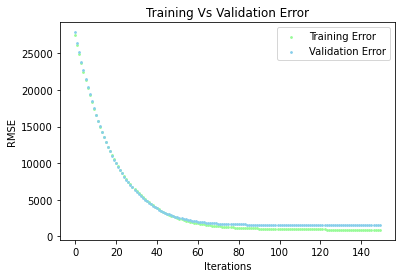

In [36]:
figsize=(30, 12)
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error', color = "palegreen", s=3)
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error', color = "skyblue", s=3)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Top 40 features important')

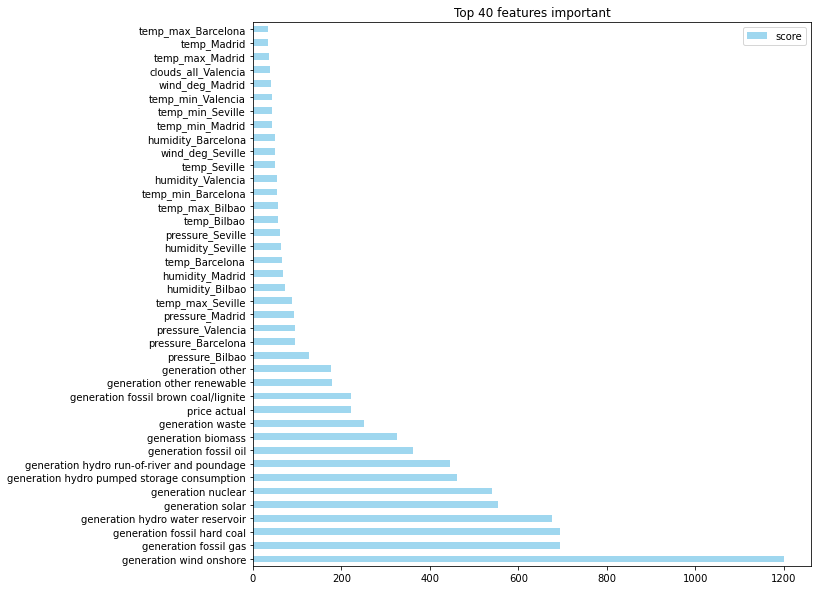

In [37]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
feature_important = xgbModel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,10), color = 'skyblue', alpha = 0.8)
plt.title("Top 40 features important")
## plot top 40 features 

In [38]:
data.nlargest(40, columns="score").head(10)

score
generation wind onshore                      1201.0
generation fossil gas                         693.0
generation fossil hard coal                   693.0
generation hydro water reservoir              676.0
generation solar                              554.0
generation nuclear                            541.0
generation hydro pumped storage consumption   461.0
generation hydro run-of-river and poundage    446.0
generation fossil oil                         361.0
generation biomass                            326.0

In [39]:
xgb_most_important_40_load = (data.nlargest(40, columns="score")).index.tolist()
xgb_most_important_40_load

['generation wind onshore',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation hydro water reservoir',
 'generation solar',
 'generation nuclear',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation fossil oil',
 'generation biomass',
 'generation waste',
 'price actual',
 'generation fossil brown coal/lignite',
 'generation other renewable',
 'generation other',
 'pressure_Bilbao',
 'pressure_Barcelona',
 'pressure_Valencia',
 'pressure_Madrid',
 'temp_max_Seville',
 'humidity_Bilbao',
 'humidity_Madrid',
 'temp_Barcelona',
 'humidity_Seville',
 'pressure_Seville',
 'temp_Bilbao',
 'temp_max_Bilbao',
 'temp_min_Barcelona',
 'humidity_Valencia',
 'temp_Seville',
 'wind_deg_Seville',
 'humidity_Barcelona',
 'temp_min_Madrid',
 'temp_min_Seville',
 'temp_min_Valencia',
 'wind_deg_Madrid',
 'clouds_all_Valencia',
 'temp_max_Madrid',
 'temp_Madrid',
 'temp_max_Barcelona']

## 2. PCA

### 2.1 PCA Price Dataset

In [7]:
pca_df = df_data.drop('price actual', axis=1)
pca_df = df_data.drop('time', axis=1)
pca_df

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil gas  generation fossil hard coal  \
0                     4844.0                       4821.0   
1                     5196.0                       4755.0   
2                     4857.0                       4581.0   
3                     4314.0                       4131.0   
4                     4130.0                       3840.0   
...                      ...                          ...   
35059                 7634.0                       2628.0   
35060                 7241.0                       2566.0   
35061                 7025.0                       2422.0   
35062                 6562.0                       2293.0   
35063                 6926.0                       2166.0   

       generation fossil oil  generation hydro pumped storage consumption  \
0                      162.0                                        863.0   
1                      158.0                                        920.0   
2                      157.0                                       1164.0   
3                      160.0                                       1503.0   
4                      156.0                                       1826.0   
...                      ...                                          ...   
35059                  178.0                                          1.0   
35060                  174.0                                          1.0   
35061                  168.0                                         50.0   
35062                  163.0                                        108.0   
35063                  163.0                                        108.0   

       generation hydro run-of-river and poundage  \
0                                          1051.0   
1                                          1009.0   
2                                           973.0   
3                                           949.0   
4                                           953.0   
...                                           ...   
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  generation other  \
0                                1899.0              7096.0              43.0   
1                                1658.0              7096.0              43.0   
2                                1371.0              7099.0              43.0   
3                                 779.0              7098.0              43.0   
4                                 720.0              7097.0              43.0   
...                                 ...                 ...               ...   
35059                            4836.0              6073.0              63.0   
35060                            3931.0              6074.0              62.0   
35061                            2831.0              6076.0              61.0   
35062                            2068.0              6075.0              61.0   
35063           

In [10]:
pca = PCA(n_components=.95)
x_pca = StandardScaler().fit_transform(pca_df)
principalComponents = pca.fit_transform(x_pca)
pca.explained_variance_ratio_

array([0.14270962, 0.06330794, 0.03896306, 0.03161291, 0.02917874,
       0.02462253, 0.02356652, 0.02053453, 0.0175307 , 0.01700983,
       0.01534106, 0.01438619, 0.01412063, 0.01311582, 0.01273881,
       0.01234919, 0.01210327, 0.01179901, 0.01133508, 0.01048612,
       0.01027362, 0.01014186, 0.00990797, 0.00975812, 0.00968684,
       0.00964808, 0.00952924, 0.00948925, 0.00931113, 0.00929362,
       0.0092205 , 0.00915122, 0.00911998, 0.00906692, 0.00905809,
       0.00904713, 0.00901091, 0.00899794, 0.00899467, 0.00895877,
       0.00894314, 0.0088896 , 0.00885934, 0.00875522, 0.00869449,
       0.00867099, 0.00861178, 0.0085768 , 0.00848626, 0.00840769,
       0.00831943, 0.00809712, 0.0079138 , 0.00777698, 0.00770398,
       0.00742906, 0.00730341, 0.00698415, 0.00644752, 0.00613978,
       0.00605062, 0.00574119, 0.00559301, 0.00538428, 0.00514062,
       0.00508653, 0.00487623, 0.00452882, 0.00442678, 0.00404789,
       0.00398543, 0.00391885, 0.00386088, 0.00382285])

In [11]:
len(pca.explained_variance_ratio_)

74

In [12]:
n_pcs= pca.components_.shape[0]
initial_feature_names = pca_df.columns
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names_price = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
len(set(most_important_names_price))

60

In [13]:
pca_most_important_price = most_important_names_price

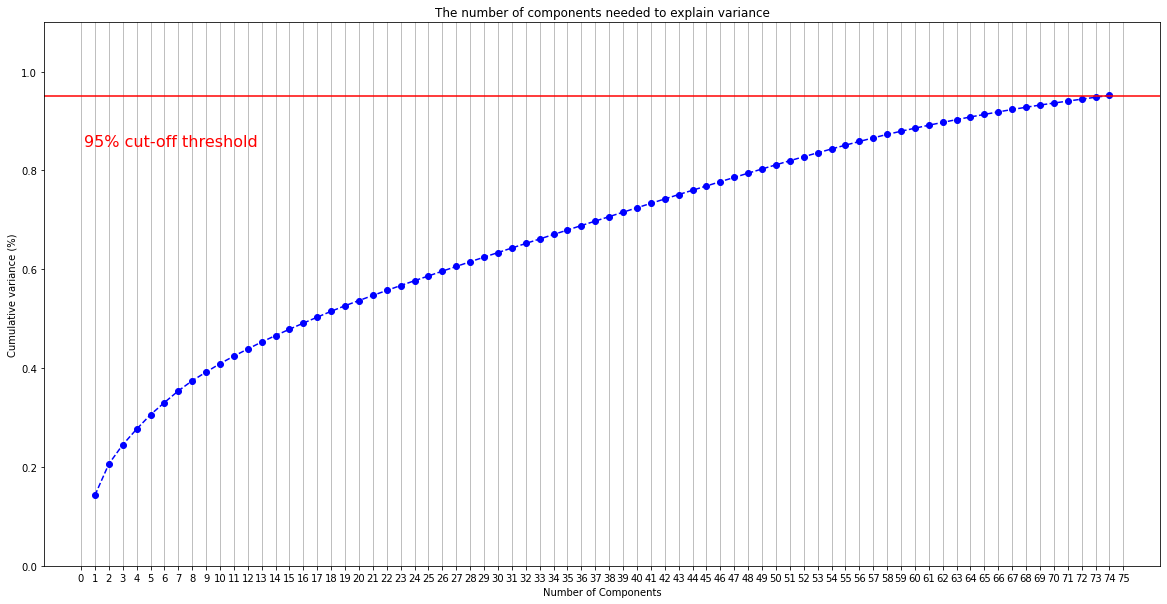

In [14]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
xi = np.arange(1, len(most_important_names_price)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(most_important_names_price)+2, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y = 0.95, color='r', linestyle='-')
plt.text(0.2, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### 2.2  PCA Electricity Load Dataset

In [46]:
pca_df = df_data.drop('total load actual', axis=1)
pca_df = df_data.drop('time', axis=1)
pca_df

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil gas  generation fossil hard coal  \
0                     4844.0                       4821.0   
1                     5196.0                       4755.0   
2                     4857.0                       4581.0   
3                     4314.0                       4131.0   
4                     4130.0                       3840.0   
...                      ...                          ...   
35059                 7634.0                       2628.0   
35060                 7241.0                       2566.0   
35061                 7025.0                       2422.0   
35062                 6562.0                       2293.0   
35063                 6926.0                       2166.0   

       generation fossil oil  generation hydro pumped storage consumption  \
0                      162.0                                        863.0   
1                      158.0                                        920.0   
2                      157.0                                       1164.0   
3                      160.0                                       1503.0   
4                      156.0                                       1826.0   
...                      ...                                          ...   
35059                  178.0                                          1.0   
35060                  174.0                                          1.0   
35061                  168.0                                         50.0   
35062                  163.0                                        108.0   
35063                  163.0                                        108.0   

       generation hydro run-of-river and poundage  \
0                                          1051.0   
1                                          1009.0   
2                                           973.0   
3                                           949.0   
4                                           953.0   
...                                           ...   
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  generation other  \
0                                1899.0              7096.0              43.0   
1                                1658.0              7096.0              43.0   
2                                1371.0              7099.0              43.0   
3                                 779.0              7098.0              43.0   
4                                 720.0              7097.0              43.0   
...                                 ...                 ...               ...   
35059                            4836.0              6073.0              63.0   
35060                            3931.0              6074.0              62.0   
35061                            2831.0              6076.0              61.0   
35062                            2068.0              6075.0              61.0   
35063           

In [47]:
len(set(most_important))


60

In [48]:
pca = PCA(n_components=.95)
x_pca = StandardScaler().fit_transform(pca_df)
principalComponents = pca.fit_transform(x_pca)
pca.explained_variance_ratio_

array([0.14270962, 0.06330794, 0.03896306, 0.03161291, 0.02917874,
       0.02462253, 0.02356652, 0.02053453, 0.0175307 , 0.01700983,
       0.01534106, 0.01438619, 0.01412063, 0.01311582, 0.01273881,
       0.01234919, 0.01210327, 0.01179901, 0.01133508, 0.01048612,
       0.01027362, 0.01014186, 0.00990797, 0.00975812, 0.00968684,
       0.00964808, 0.00952924, 0.00948925, 0.00931113, 0.00929362,
       0.0092205 , 0.00915122, 0.00911998, 0.00906692, 0.00905809,
       0.00904713, 0.00901091, 0.00899794, 0.00899467, 0.00895877,
       0.00894314, 0.0088896 , 0.00885934, 0.00875522, 0.00869449,
       0.00867099, 0.00861178, 0.0085768 , 0.00848626, 0.00840769,
       0.00831943, 0.00809712, 0.0079138 , 0.00777698, 0.00770398,
       0.00742906, 0.00730341, 0.00698415, 0.00644752, 0.00613978,
       0.00605062, 0.00574119, 0.00559301, 0.00538428, 0.00514062,
       0.00508653, 0.00487623, 0.00452882, 0.00442678, 0.00404789,
       0.00398543, 0.00391885, 0.00386088, 0.00382285])

In [49]:
len(pca.explained_variance_ratio_)

74

In [50]:
n_pcs= pca.components_.shape[0]
initial_feature_names = pca_df.columns
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names_load = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names_load

['temp_Madrid',
 'pressure_Barcelona',
 'generation fossil hard coal',
 'generation biomass',
 'generation other renewable',
 'clouds_all_Bilbao',
 'weather_main_clear_Barcelona',
 'generation hydro water reservoir',
 'generation hydro water reservoir',
 'weather_main_clear_Bilbao',
 'weather_main_clear_Barcelona',
 'weather_main_clouds_Barcelona',
 'weather_main_clouds_Valencia',
 'weather_main_rain_Valencia',
 'weather_main_clouds_Seville',
 'snow_3h_Valencia',
 'rain_1h_Seville',
 'rain_1h_Madrid',
 'weather_main_mist_Barcelona',
 'weather_main_snow_Barcelona',
 'generation nuclear',
 'generation nuclear',
 'weather_main_drizzle_Seville',
 'weather_main_thunderstorm_Valencia',
 'weather_main_snow_Madrid',
 'weather_main_drizzle_Barcelona',
 'weather_main_mist_Bilbao',
 'weather_main_fog_Seville',
 'weather_main_drizzle_Madrid',
 'weather_main_haze_Seville',
 'weather_main_dust_Seville',
 'weather_main_drizzle_Bilbao',
 'weather_main_thunderstorm_Seville',
 'weather_main_mist_Valenci

In [51]:
pca_most_important_load = most_important_names_load
pca_most_important_load

['temp_Madrid',
 'pressure_Barcelona',
 'generation fossil hard coal',
 'generation biomass',
 'generation other renewable',
 'clouds_all_Bilbao',
 'weather_main_clear_Barcelona',
 'generation hydro water reservoir',
 'generation hydro water reservoir',
 'weather_main_clear_Bilbao',
 'weather_main_clear_Barcelona',
 'weather_main_clouds_Barcelona',
 'weather_main_clouds_Valencia',
 'weather_main_rain_Valencia',
 'weather_main_clouds_Seville',
 'snow_3h_Valencia',
 'rain_1h_Seville',
 'rain_1h_Madrid',
 'weather_main_mist_Barcelona',
 'weather_main_snow_Barcelona',
 'generation nuclear',
 'generation nuclear',
 'weather_main_drizzle_Seville',
 'weather_main_thunderstorm_Valencia',
 'weather_main_snow_Madrid',
 'weather_main_drizzle_Barcelona',
 'weather_main_mist_Bilbao',
 'weather_main_fog_Seville',
 'weather_main_drizzle_Madrid',
 'weather_main_haze_Seville',
 'weather_main_dust_Seville',
 'weather_main_drizzle_Bilbao',
 'weather_main_thunderstorm_Seville',
 'weather_main_mist_Valenci

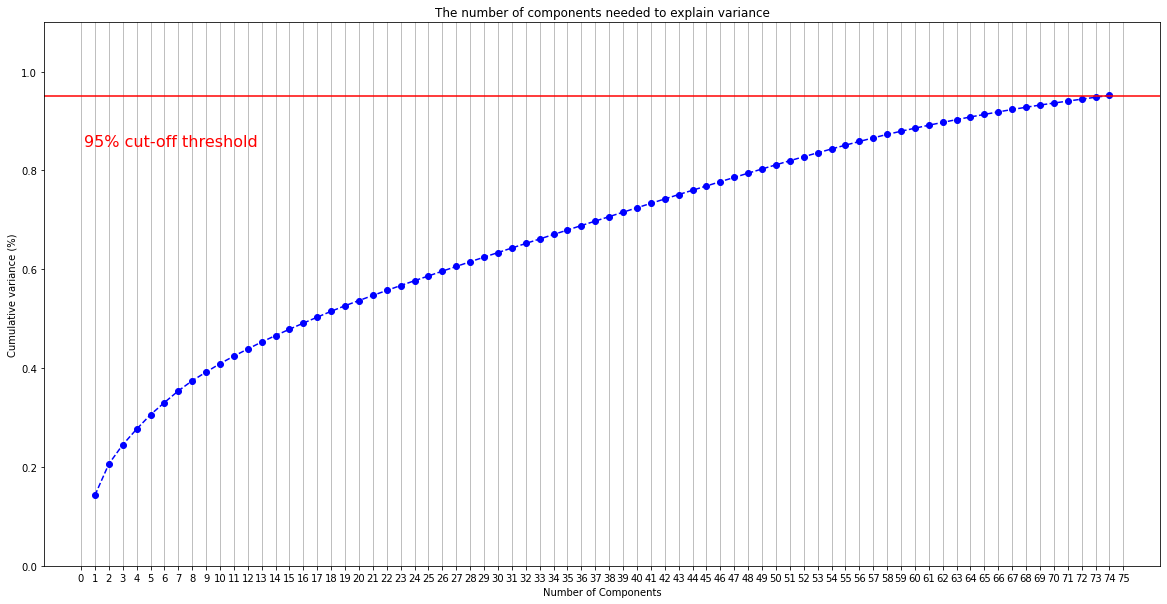

In [52]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
xi = np.arange(1, len(most_important_names_load)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(most_important_names_load)+2, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y = 0.95, color='r', linestyle='-')
plt.text(0.2, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## 3. Prepare DataSets

In [53]:
most_important_features_price = list(set(xgb_most_important_50_price + pca_most_important_price))
len(most_important_features_price)

91

In [54]:
most_important_features_load = list(set(xgb_most_important_40_load + pca_most_important_load))
len(most_important_features_load)

87

In [55]:
def prepare_dataset(df_origin, col_name, most_important_features):
    df = df_data[["time", col_name]]
    for name in most_important_features:
        df =df.merge(df_data[name], left_index=True,right_index=True)

    return df

In [56]:
df_price = prepare_dataset(df_data, 'price actual', most_important_features_price)
df_price

time  price actual  temp_max_Seville  \
0      2014-12-31 23:00:00+00:00         65.41           273.375   
1      2015-01-01 00:00:00+00:00         64.92           273.375   
2      2015-01-01 01:00:00+00:00         64.48           274.086   
3      2015-01-01 02:00:00+00:00         59.32           274.086   
4      2015-01-01 03:00:00+00:00         56.04           274.086   
...                          ...           ...               ...   
35059  2018-12-31 18:00:00+00:00         77.02           288.150   
35060  2018-12-31 19:00:00+00:00         76.16           286.150   
35061  2018-12-31 20:00:00+00:00         74.30           285.150   
35062  2018-12-31 21:00:00+00:00         69.89           284.150   
35063  2018-12-31 22:00:00+00:00         69.88           285.150   

       weather_main_clouds_Barcelona  temp_Seville  temp_min_Barcelona  \
0                                  0       273.375             281.625   
1                                  0       273.375             281.625   
2                                  0       274.086             281.286   
3                                  0       274.086             281.286   
4                                  0       274.086             281.286   
...                              ...           ...                 ...   
35059                              0       287.760             282.150   
35060                              0       285.760             281.150   
35061                              0       285.150             280.150   
35062                              0       284.150             278.150   
35063                              0       283.970             277.150   

       weather_main_dust_Barcelona  weather_main_mist_Valencia  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   
...                            ...                         ...   
35059                            0                           0   
35060                            0                           0   
35061                            0                           0   
35062                            0                           0   
35063                            0                           0   

       weather_main_mist_Bilbao  wind_speed_Bilbao  ...  \
0                             0                0.0  ...   
1                             0                0.0  ...   
2                             0                1.0  ...   
3                             0                1.0  ...   
4                             0                1.0  ...   
...                         ...                ...  ...   
35059                         0                0.0  ...   
35060                         0                1.0  ...   
35061                         0                1.0  ...   
35062                         0                1.0  ...   
35063                         0                2.0  ...   

       generation fossil hard coal  weather_main_drizzle_Barcelona  \
0                           4821.0                               0   
1                           4755.0                               0   
2                           4581.0                               0   
3                           4131.0                               0   
4                           3840.0                               0   
...                            ...                             ...   
35059                       2628.0                               0   
35060                       2566.0                               0   
35061                       2422.0                               0   
35062                       2293.0                               0   
35063                       2166.0                

In [57]:
# df_price.to_csv(r'output_data_sets/df_prices_mif.csv', index = False, header=True)

In [58]:
df_load = prepare_dataset(df_data, 'total load actual', most_important_features_load)
df_load.columns.to_list()

['time',
 'total load actual',
 'temp_max_Seville',
 'weather_main_clouds_Barcelona',
 'temp_Seville',
 'temp_min_Barcelona',
 'weather_main_dust_Barcelona',
 'weather_main_mist_Valencia',
 'weather_main_mist_Bilbao',
 'wind_speed_Bilbao',
 'rain_1h_Barcelona',
 'weather_main_fog_Madrid',
 'pressure_Bilbao',
 'generation other',
 'temp_min_Seville',
 'wind_deg_Seville',
 'generation waste',
 'generation wind onshore',
 'weather_main_drizzle_Bilbao',
 'pressure_Madrid',
 'weather_main_thunderstorm_Bilbao',
 'rain_1h_Seville',
 'weather_main_haze_Madrid',
 'wind_speed_Seville',
 'clouds_all_Valencia',
 'weather_main_fog_Barcelona',
 'clouds_all_Bilbao',
 'weather_main_clear_Bilbao',
 'temp_max_Bilbao',
 'generation hydro pumped storage consumption',
 'humidity_Madrid',
 'generation solar',
 'humidity_Seville',
 'weather_main_clear_Barcelona',
 'weather_main_thunderstorm_Seville',
 'weather_main_smoke_Seville',
 'pressure_Barcelona',
 'weather_main_drizzle_Madrid',
 'pressure_Seville',
 '

In [59]:
# df_load.to_csv(r'output_data_sets/df_loads_mif.csv', index = False, header=True)

# Feature Engineering

## Price Dataset

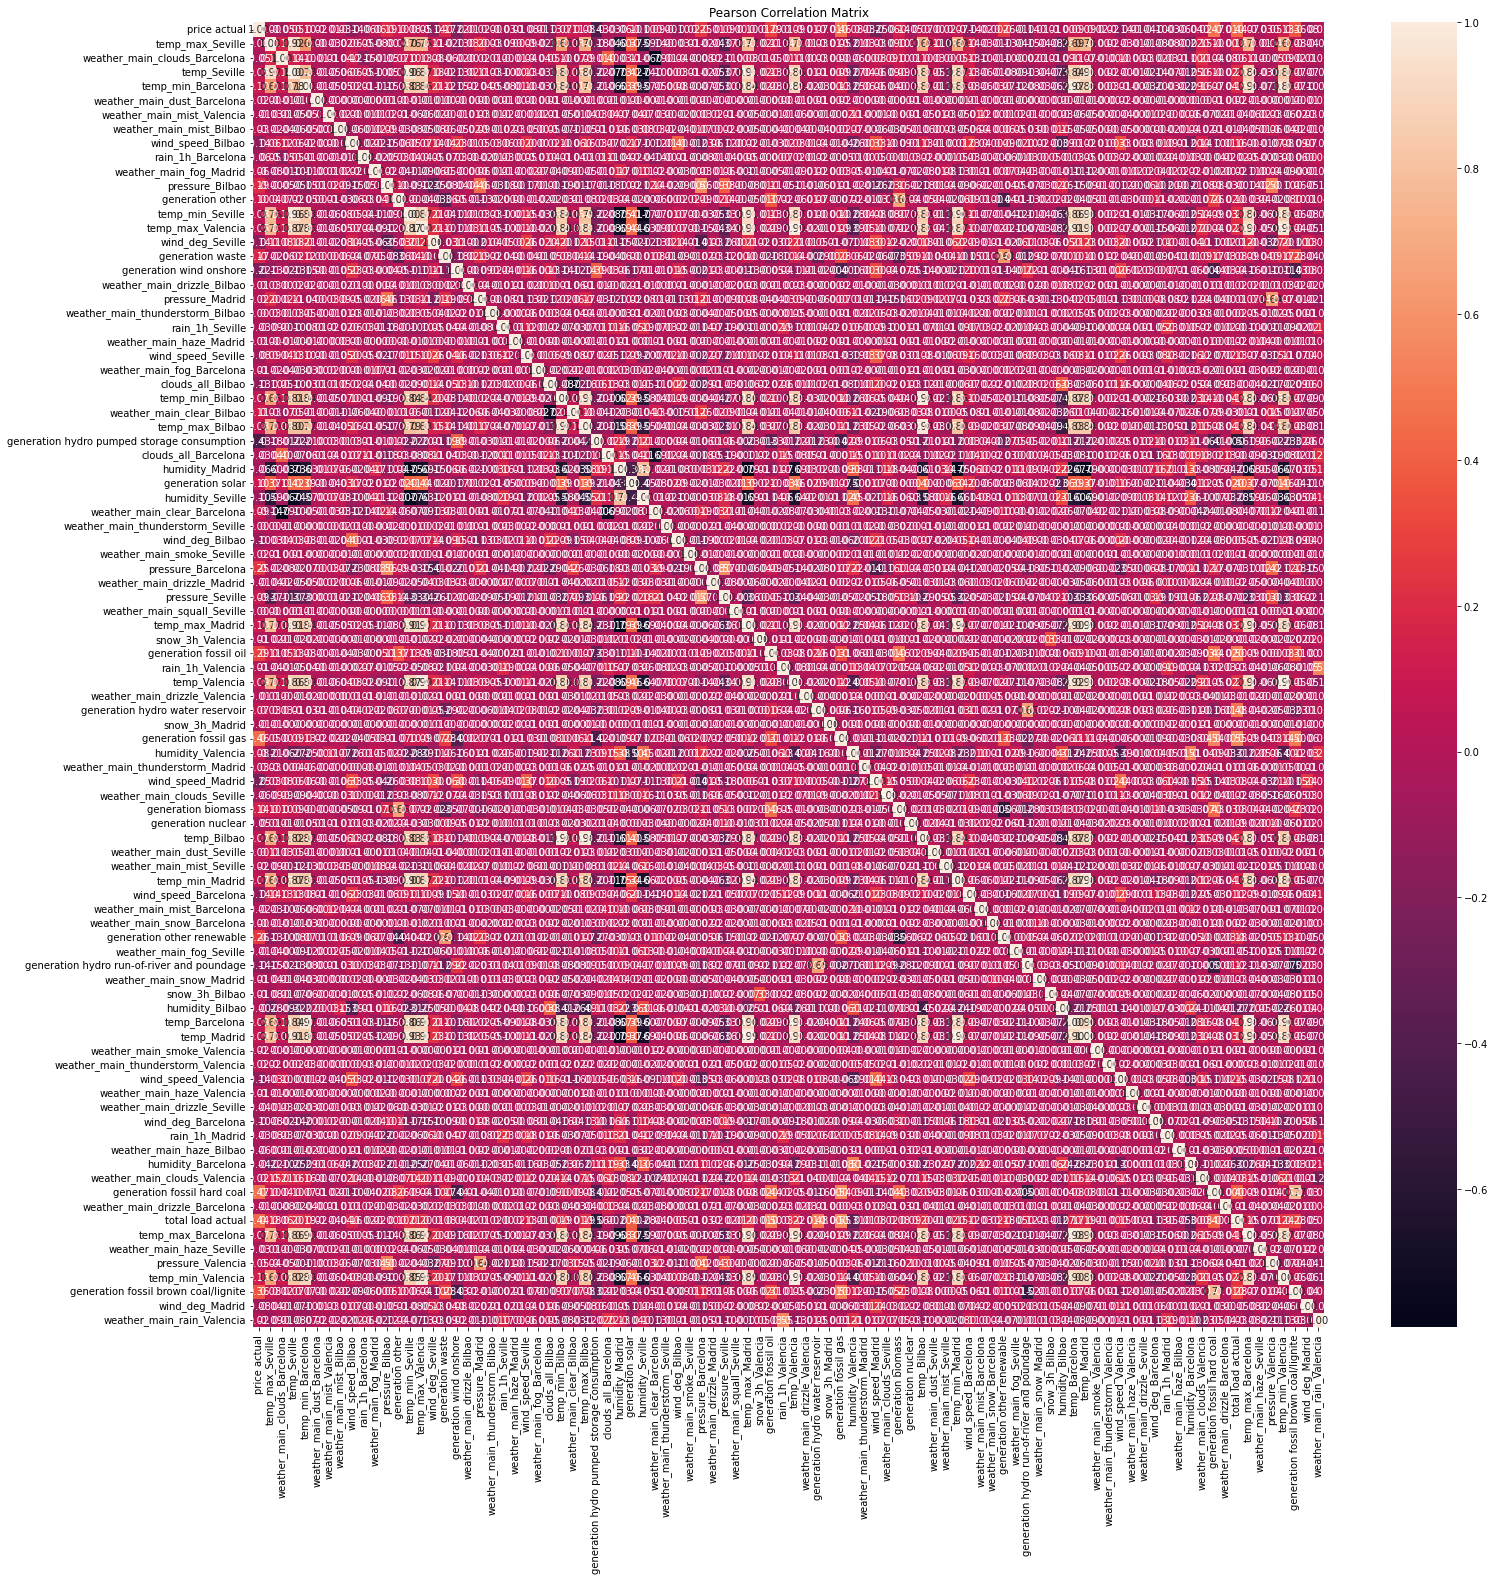

In [61]:
correlations = df_price.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [63]:
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
generation fossil oil                          0.285050
generation other renewable                     0.255551
pressure_Barcelona                             0.246969
pressure_Bilbao                                0.194063
generation waste                               0.168710
generation biomass                             0.142671
temp_min_Valencia                              0.133141
weather_main_clear_Bilbao                      0.106470
temp_min_Barcelona                             0.103726
generation other                               0.099914
generation solar                               0.098529
temp_max_Madrid                                0.096279
temp_Valencia                                  0

In [62]:
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

temp_max_Seville                      temp_Seville                            0.915622
                                      temp_min_Seville                        0.763627
                                      temp_max_Valencia                       0.753980
                                      temp_max_Madrid                         0.773055
temp_Seville                          temp_max_Seville                        0.915622
                                      temp_min_Barcelona                      0.777557
                                      temp_min_Seville                        0.957684
                                      temp_max_Valencia                       0.874618
                                      temp_min_Bilbao                         0.807084
                                      temp_max_Bilbao                         0.798354
                                      temp_max_Madrid                         0.910091
                                      temp_

In [84]:
df_price_final = df_price
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(df_price_final)):
    position = df_price_final.index[i]
    for city in cities:
        temp_max = df_price_final.loc[position, 'temp_max_{}'.format(city)]
        temp_min = df_price_final.loc[position, 'temp_min_{}'.format(city)]
        df_price_final.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)
df_price_final['generation coal all'] = df_price['generation fossil hard coal'] + df_price['generation fossil brown coal/lignite']

In [87]:
for city in cities:
    df_price_final = df_price_final.drop([ f'temp_max_{city}', f'temp_min_{city}'], axis = 1)
df_price_final = df_price_final.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1)

In [89]:
correlations = df_price_final.corr(method='pearson')
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

temp_Seville      temp_Valencia       0.860792
                  temp_Bilbao         0.821292
                  temp_Barcelona      0.841910
                  temp_Madrid         0.909421
humidity_Madrid   humidity_Seville    0.772896
humidity_Seville  humidity_Madrid     0.772896
temp_Valencia     temp_Seville        0.860792
                  temp_Bilbao         0.853744
                  temp_Barcelona      0.917506
                  temp_Madrid         0.912281
temp_Bilbao       temp_Seville        0.821292
                  temp_Valencia       0.853744
                  temp_Barcelona      0.866727
                  temp_Madrid         0.872668
temp_Barcelona    temp_Seville        0.841910
                  temp_Valencia       0.917506
                  temp_Bilbao         0.866727
                  temp_Madrid         0.903996
temp_Madrid       temp_Seville        0.909421
                  temp_Valencia       0.912281
                  temp_Bilbao         0.872668
             

In [92]:
df_price_final["temp_mean"] = (df_price_final['temp_Barcelona']+df_price_final['temp_Valencia']+df_price_final['temp_Bilbao']+df_price_final['temp_Madrid']+df_price_final['temp_Seville'])/5

In [91]:
df_price_final = df_price_final.drop(['temp_Barcelona', 'temp_Valencia', 'temp_Bilbao','temp_Madrid','temp_Seville'], axis = 1)
df_price_final

time  price actual  weather_main_clouds_Barcelona  \
0      2014-12-31 23:00:00+00:00         65.41                              0   
1      2015-01-01 00:00:00+00:00         64.92                              0   
2      2015-01-01 01:00:00+00:00         64.48                              0   
3      2015-01-01 02:00:00+00:00         59.32                              0   
4      2015-01-01 03:00:00+00:00         56.04                              0   
...                          ...           ...                            ...   
35059  2018-12-31 18:00:00+00:00         77.02                              0   
35060  2018-12-31 19:00:00+00:00         76.16                              0   
35061  2018-12-31 20:00:00+00:00         74.30                              0   
35062  2018-12-31 21:00:00+00:00         69.89                              0   
35063  2018-12-31 22:00:00+00:00         69.88                              0   

       weather_main_dust_Barcelona  weather_main_mist_Valencia  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   
...                            ...                         ...   
35059                            0                           0   
35060                            0                           0   
35061                            0                           0   
35062                            0                           0   
35063                            0                           0   

       weather_main_mist_Bilbao  wind_speed_Bilbao  rain_1h_Barcelona  \
0                             0                0.0                0.0   
1                             0                0.0                0.0   
2                             0                1.0                0.0   
3                             0                1.0                0.0   
4                             0                1.0                0.0   
...                         ...                ...                ...   
35059                         0                0.0                0.0   
35060                         0                1.0                0.0   
35061                         0                1.0                0.0   
35062                         0                1.0                0.0   
35063                         0                2.0                0.0   

       weather_main_fog_Madrid  pressure_Bilbao  ...  pressure_Valencia  \
0                            0           1036.0  ...             1001.0   
1                            0           1035.0  ...             1001.0   
2                            0           1036.0  ...             1002.0   
3                            0           1035.0  ...             1002.0   
4                            0           1035.0  ...             1002.0   
...                        ...              ...  ...                ...   
35059                        0           1033.0  ...             1028.0   
35060                        0           1034.0  ...             1029.0   
35061                        0           1034.0  ...             1029.0   
35062                        0           1034.0  ...             1029.0   
35063                        0           1034.0  ...             1029.0   

       wind_deg_Madrid  weather_main_rain_Valencia  temp_range_Barcelona  \
0                309.0                           0                   0.0   
1                309.0                           0                   0.0   
2                273.0                           0                   0.0   
3                273.0                           0                   0.0   
4                273.0                           0                   0.0   
...                ...      

In [93]:
correlations = df_price_final.corr(method='pearson')
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

humidity_Madrid   humidity_Seville    0.772896
humidity_Seville  humidity_Madrid     0.772896


In [94]:
# df_price_final.to_csv(r'output_data_sets/df_prices_mif_final.csv', index = False, header=True)

## Load Dataset

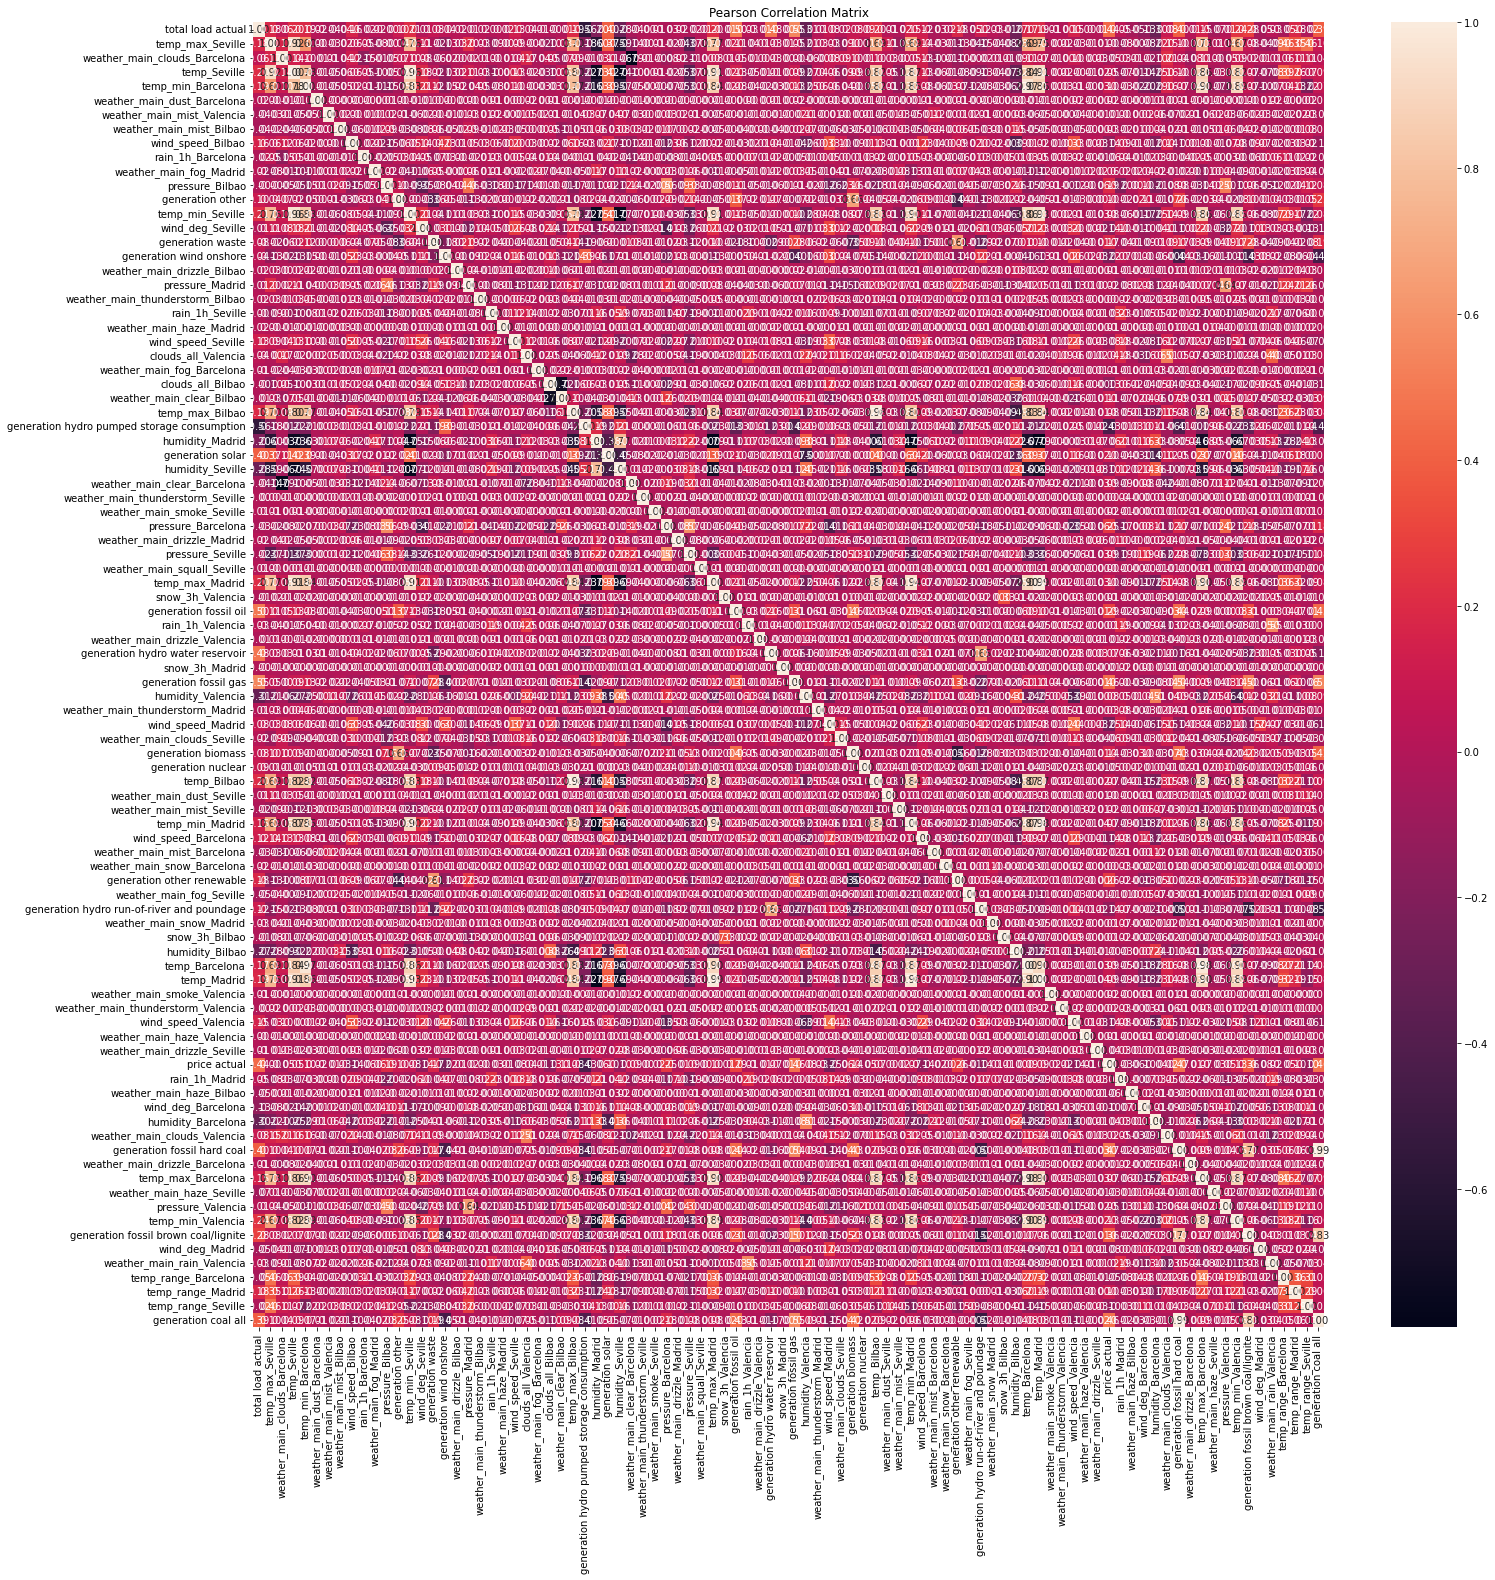

In [115]:
correlations_l = df_load.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations_l, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [116]:
print(correlations_l['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
generation fossil gas                          0.548986
generation fossil oil                          0.496139
generation hydro water reservoir               0.479491
price actual                                   0.435253
generation fossil hard coal                    0.397079
generation solar                               0.395511
generation coal all                            0.391174
generation fossil brown coal/lignite           0.280735
temp_min_Valencia                              0.235297
temp_min_Seville                               0.206488
temp_max_Madrid                                0.204718
temp_Seville                                   0.204571
temp_Bilbao                                    0.196535
temp_max_Bilbao                                0.194181
temp_min_Barcelona                             0.187417
temp_Madrid                                    0.185388
generation other renewable                     0

In [117]:
highly_correlated_l = abs(correlations_l[correlations_l > 0.75])
print(highly_correlated_l[highly_correlated_l < 1.0].stack().to_string())

temp_max_Seville                      temp_Seville                            0.915622
                                      temp_min_Seville                        0.763627
                                      temp_max_Madrid                         0.773055
temp_Seville                          temp_max_Seville                        0.915622
                                      temp_min_Barcelona                      0.777557
                                      temp_min_Seville                        0.957684
                                      temp_max_Bilbao                         0.798354
                                      temp_max_Madrid                         0.910091
                                      temp_Bilbao                             0.821292
                                      temp_min_Madrid                         0.869154
                                      temp_Barcelona                          0.841910
                                      temp_

In [118]:
df_load_final = df_load
cities = ['Barcelona', 'Madrid', 'Seville']

for i in range(len(df_load_final)):
    position = df_load_final.index[i]
    for city in cities:
        temp_max = df_load_final.loc[position, 'temp_max_{}'.format(city)]
        temp_min = df_load_final.loc[position, 'temp_min_{}'.format(city)]
        df_load_final.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)
df_load_final['generation coal all'] = df_load['generation fossil hard coal'] + df_load['generation fossil brown coal/lignite']

In [119]:
for city in cities:
    try:
        df_load_final = df_load_final.drop([ f'temp_max_{city}', f'temp_min_{city}'], axis = 1)
    except Exception:
        pass
df_load_final = df_load_final.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1)

In [120]:
correlations_l = df_load_final.corr(method='pearson')
highly_correlated_l = abs(correlations_l[correlations_l > 0.75])
print(highly_correlated_l[highly_correlated_l < 1.0].stack().to_string())

temp_Seville       temp_max_Bilbao      0.798354
                   temp_Bilbao          0.821292
                   temp_Barcelona       0.841910
                   temp_Madrid          0.909421
                   temp_min_Valencia    0.824563
temp_max_Bilbao    temp_Seville         0.798354
                   temp_Bilbao          0.977933
                   temp_Barcelona       0.828347
                   temp_Madrid          0.836002
                   temp_min_Valencia    0.802560
humidity_Madrid    humidity_Seville     0.772896
humidity_Seville   humidity_Madrid      0.772896
temp_Bilbao        temp_Seville         0.821292
                   temp_max_Bilbao      0.977933
                   temp_Barcelona       0.866727
                   temp_Madrid          0.872668
                   temp_min_Valencia    0.833132
temp_Barcelona     temp_Seville         0.841910
                   temp_max_Bilbao      0.828347
                   temp_Bilbao          0.866727
                   t

In [122]:
df_load_final["temp_mean"] = (df_load_final['temp_Barcelona']+df_load_final['temp_Madrid']+df_load_final['temp_Seville']+df_load_final['temp_Bilbao'])/4

In [123]:
df_load_final = df_load_final.drop(['temp_Barcelona','temp_Madrid','temp_Seville', 'temp_Bilbao'], axis = 1)
df_load_final

time  total load actual  \
0      2014-12-31 23:00:00+00:00            25385.0   
1      2015-01-01 00:00:00+00:00            24382.0   
2      2015-01-01 01:00:00+00:00            22734.0   
3      2015-01-01 02:00:00+00:00            21286.0   
4      2015-01-01 03:00:00+00:00            20264.0   
...                          ...                ...   
35059  2018-12-31 18:00:00+00:00            30653.0   
35060  2018-12-31 19:00:00+00:00            29735.0   
35061  2018-12-31 20:00:00+00:00            28071.0   
35062  2018-12-31 21:00:00+00:00            25801.0   
35063  2018-12-31 22:00:00+00:00            24455.0   

       weather_main_clouds_Barcelona  weather_main_dust_Barcelona  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   
...                              ...                          ...   
35059                              0                            0   
35060                              0                            0   
35061                              0                            0   
35062                              0                            0   
35063                              0                            0   

       weather_main_mist_Valencia  weather_main_mist_Bilbao  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
35059                           0                         0   
35060                           0                         0   
35061                           0                         0   
35062                           0                         0   
35063                           0                         0   

       wind_speed_Bilbao  rain_1h_Barcelona  weather_main_fog_Madrid  \
0                    0.0                0.0                        0   
1                    0.0                0.0                        0   
2                    1.0                0.0                        0   
3                    1.0                0.0                        0   
4                    1.0                0.0                        0   
...                  ...                ...                      ...   
35059                0.0                0.0                        0   
35060                1.0                0.0                        0   
35061                1.0                0.0                        0   
35062                1.0                0.0                        0   
35063                2.0                0.0                        0   

       pressure_Bilbao  ...  weather_main_haze_Seville  pressure_Valencia  \
0               1036.0  ...                          0             1001.0   
1               1035.0  ...                          0             1001.0   
2               1036.0  ...                          0             1002.0   
3               1035.0  ...                          0             1002.0   
4               1035.0  ...                          0             1002.0   
...                ...  ...                        ...                ...   
35059           1033.0  ...                          0             1028.0   
35060           1034.0  ...                          0             1029.0   
35061           1034.0  ...                          0             1029.0   
35062           1034.0  ...                          0             1029.0   
35063           1034.0  ...                          0             10

In [124]:
df_load_final = df_load_final.drop(['temp_max_Bilbao','temp_min_Valencia'], axis = 1)

In [125]:
correlations_l = df_load_final.corr(method='pearson')
highly_correlated_l = abs(correlations_l[correlations_l > 0.75])
print(highly_correlated_l[highly_correlated_l < 1.0].stack().to_string())

humidity_Madrid   humidity_Seville    0.772896
humidity_Seville  humidity_Madrid     0.772896


In [126]:
# df_load_final.to_csv(r'output_data_sets/df_load_mif_final.csv', index = False, header=True)